## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [7]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

In [20]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [21]:
X.shape

(2, 10)

In [22]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [28]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

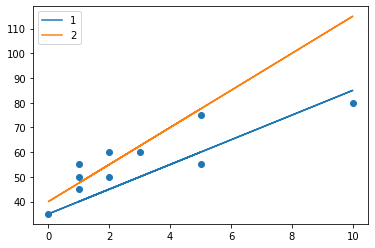

In [34]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [32]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [33]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [34]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

In [67]:
W_0 = np.linalg.inv(X @ X.T) @ X @ y
W_0

array([45.0625,  3.8125])

Метод наименьших квадратов (МНК):

In [35]:
X.shape

(2, 10)

In [36]:
X.T.shape

(10, 2)

In [37]:
all(X @ y == np.dot(X,y))

True

In [38]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [53]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

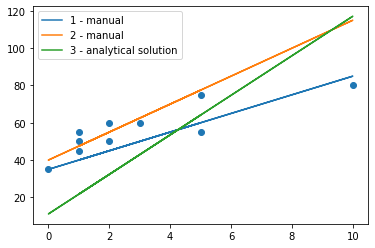

In [54]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [55]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [56]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [57]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [58]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(22.8375, 597.4895833333333)

Градиентный спуск

In [59]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [60]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [64]:
W[0], W[0] - g

(11.104166666666664, 12.012083333333331)

### Практическое задание

1. Подберите скорость обучения (alpha) и количество итераций.

In [48]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


In [49]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [5.85 5.35], MSE = 3047.75
Iteration #10: W_new = [11.0965715 10.5965715], MSE = 597.49
Iteration #20: W_new = [11.10415569 10.60415569], MSE = 597.49
Iteration #30: W_new = [11.10416665 10.60416665], MSE = 597.49
Iteration #40: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #50: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #60: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #70: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #80: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #90: W_new = [11.10416667 10.60416667], MSE = 597.49


*3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

## Задача 1. Подберите скорость обучения (alpha) и количество итераций

In [50]:
def grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    
    n = X.shape[1]
    W = np.array([1, 0.5])  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    while stop_chek:
        n_iter += 1
        y_pred = W @ X
        err = calc_mse(y, y_pred)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err

In [78]:
W_1, mse_1 = grad_desc(X, y, alpha=0.01, verbose=True)
W_1, mse_1

100 [28.22929764  6.86494171] 179.89501370640295
200 [38.32845066  5.03361602] 65.72191623045093
300 [42.36857287  4.30100215] 47.450051024147385
400 [43.98480618  4.00792316] 44.525885301240166
500 [44.63137328  3.89067818] 44.05791199482176
600 [44.89002963  3.84377484] 43.98301917537428
700 [44.99350398  3.82501136] 43.97103358917125
800 [45.03489844  3.81750512] 43.969115457664245
900 [45.05145812  3.81450228] 43.968808486572826
1000 [45.05808274  3.813301  ] 43.96875935998757
1100 [45.0607329   3.81282044] 43.968751497939834
1200 [45.06179308  3.81262819] 43.96875023972508
1300 [45.0622172   3.81255128] 43.96875003836477
1400 [45.06238687  3.81252052] 43.96875000613976
1500 [45.06245474  3.81250821] 43.96875000098258
1600 [45.06248189  3.81250328] 43.96875000015726
1700 [45.06249276  3.81250131] 43.96875000002515
1800 [45.0624971   3.81250053] 43.968750000004036
Stop descent! iteration: 1886, weights: [45.06249867  3.81250024], mse: 43.96875000000084


(array([45.06249868,  3.81250024]), 43.96875000000084)

При a=0.01 максимально приблизились к минимуму за 1886 итераций.

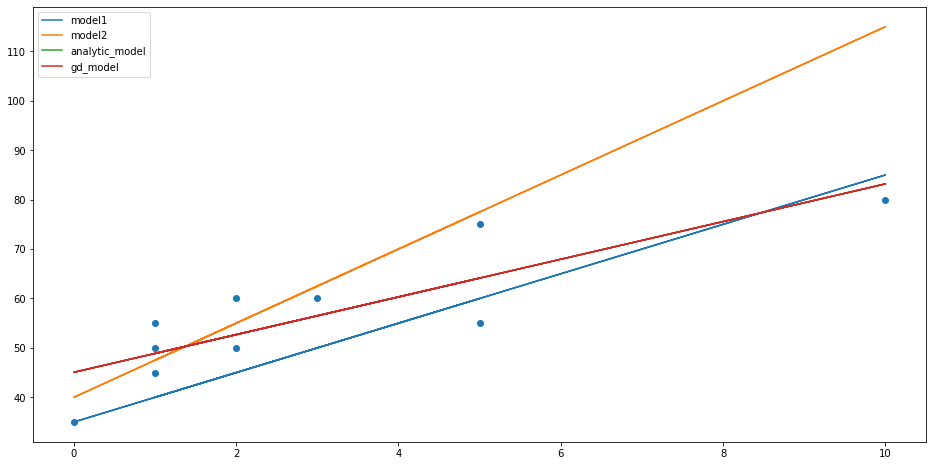

In [68]:
plt.figure(figsize=(16, 8))
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='model1')
plt.plot(X[1], 40 * np.ones(10) + X[1] * 7.5, label='model2')
plt.plot(X[1], W_0[0] + W_0[1] * X[1], label='analytic_model')
plt.plot(X[1], W_1[0] + W_1[1] * X[1], label='gd_model')
plt.legend(loc='best')
plt.show()

### Задача 2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.

In [92]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [5.85 5.35], MSE = 3047.75
Iteration #10: W_new = [11.0965715 10.5965715], MSE = 597.49
Iteration #20: W_new = [11.10415569 10.60415569], MSE = 597.49
Iteration #30: W_new = [11.10416665 10.60416665], MSE = 597.49
Iteration #40: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #50: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #60: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #70: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #80: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #90: W_new = [11.10416667 10.60416667], MSE = 597.49


Решение:

Ошибки были в строке вывода print, где неправильно указана формула для MSE, и неправильные параметры в функции np.sum

In [86]:
n = X.shape[1]
alpha = 0.01 # подобранные значения alpha и оптимальное количество итераций
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(1886):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)) # добавили axis=1,сумма элементов в строках
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {err}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.6534565814403
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.0253200502415
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.2425289713664
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.6639230494043
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.57641516768024
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.7212205667205
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.21773784067534
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.50023052373837
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.26510994861874
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.42704441959268
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08241692977836
Iteration #120: W_new = [31.17545797  6.3